# World Happiness Report



### The dataset that i am going to use is downloaded from  https://www.kaggle.com/unsdsn/world-happiness .This dataset has factors like family, freedom, trust on government, GDP of a country,etc. and countries are ranked on the basis of these factors.We are going to analyse how these  factors affect in determining how happy a country is.

In [3]:
project_name = "zerotopandas-course-project" 

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "pranavrnambiar/zerotopandas-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/pranavrnambiar/zerotopandas-course-project


'https://jovian.ml/pranavrnambiar/zerotopandas-course-project'

## Data Preparation and Cleaning

TODO

In [7]:
import pandas as pd
import numpy as np

In [8]:
#the following datasets are downloaded from 'https://www.kaggle.com/unsdsn/world-happiness'
df = pd.read_csv('2019.csv')


### Here I am using df  DataFrame for further analysis and the other DataFrames for comparison

In [9]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


###  So,shape of this dataframe is (156,9).It has country and region columns and the happiness ranks and scores are given with other important data as well.

# We will use *info()* to obtain the data types and non null counts of the columns:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### All the columns except Country or region are numeric columns so we can easily plot graphs for our analysis

###  let us use describe()  method to find the basic statistics of the columns.(this will help in eliminating any wierd values)

In [11]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### All the values seem to be right except the zeros at Family and Economy (GDP per Capita).As we are dealing with ranks of the countries so we will not drop them

In [12]:
df= df.set_index('Country or region')

In [13]:
df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [14]:
import jovian

In [15]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranavrnambiar/zerotopandas-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/pranavrnambiar/zerotopandas-course-project


'https://jovian.ml/pranavrnambiar/zerotopandas-course-project'

## Exploratory Analysis and Visualization

TODO

### The Average Healthy life expectancy of the world can be calculated as follows: 

In [16]:
mean_health = df['Healthy life expectancy'].mean()
print('Health Life expectancy  is',mean_health)

Health Life expectancy  is 0.7252435897435898


### let's import the required libraries and functions for plotting graphs

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### let us plot a graph of Freedom of making life choices  vs  rank

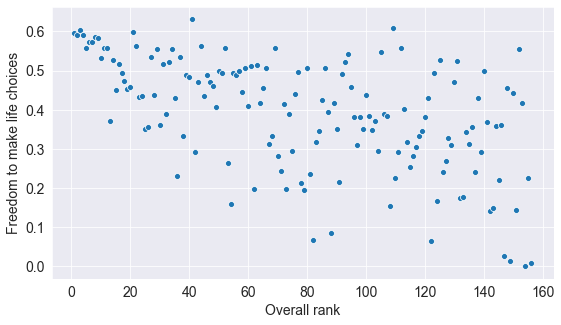

In [18]:
rand_df = df.copy()
rand_df = rand_df.reset_index()

sns.scatterplot(rand_df['Overall rank'],rand_df['Freedom to make life choices']);

### As we can see Countries with lower happiness ranks have higher freedom scores.So, we can say that Freedom is a major contributing factor in deciding how happy a nation is.

### Let's consider the top 15 countries 

In [19]:
top_happy_countries = df.head(15)
top_happy_countries

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
Sweden,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373
New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380
Canada,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308


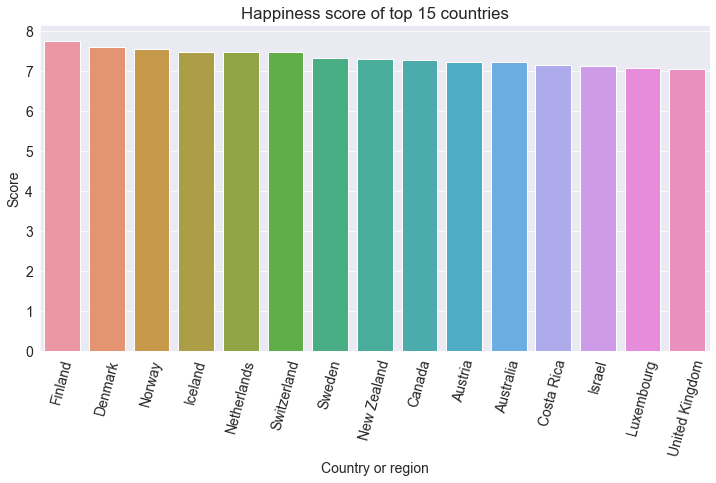

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.xlabel('Countries')
plt.ylabel('Happiness score')
plt.title('Happiness score of top 15 countries')

sns.barplot(top_happy_countries.index,top_happy_countries['Score']);

###  We can see that Finland  has highest happiness score which is calculated using data in other columns.

NameError: name 'df_2015' is not defined

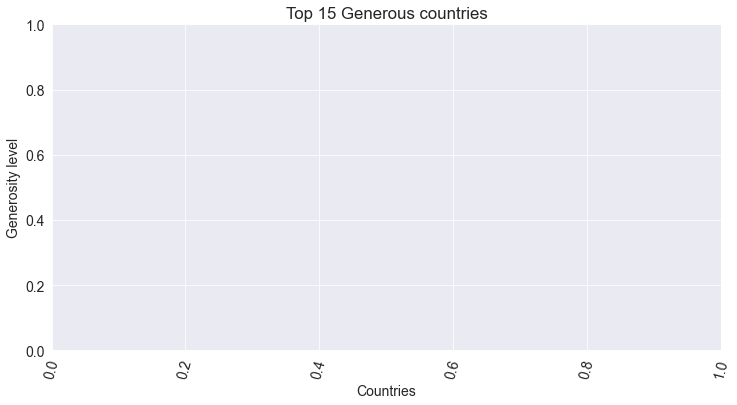

In [21]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.xlabel('Countries')
plt.ylabel('Generosity level')
plt.title('Top 15 Generous countries')
sns.barplot(df['Generosity'].nlargest(15).index , df_2015['Generosity'].nlargest(15));

In [ ]:
df.at['Myanmar','Overall rank']

#### So Myanmar has highest generosity level and it's Happiness Rank is 131 and Finland is not even in top 15 in generosity level.So this proves that there are many contributing factors while deciding happiness of a country.

Text(0.5, 0, 'Countries')

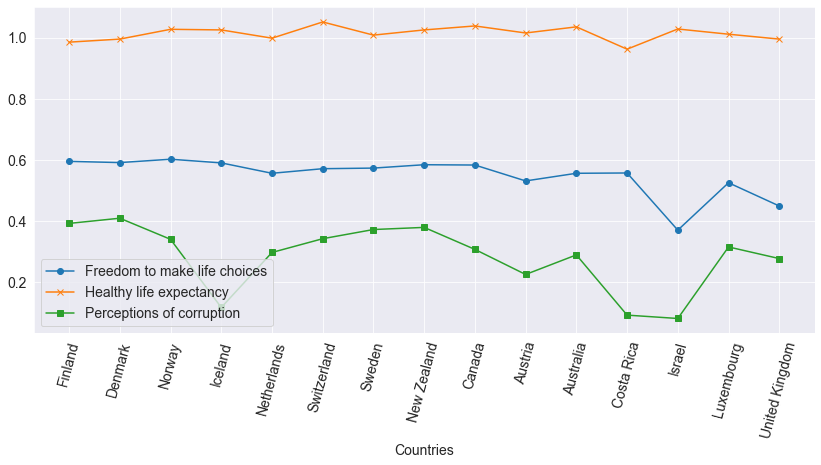

In [22]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=75)
plt.plot(top_happy_countries['Freedom to make life choices'],marker='o')
plt.plot(top_happy_countries['Healthy life expectancy'],marker='x')
plt.plot(top_happy_countries['Perceptions of corruption'],marker='s')
plt.legend(['Freedom to make life choices','Healthy life expectancy','Perceptions of corruption'])

plt.xlabel('Countries')


### The  plot  of freedom,health  and trust of top 15 happiness scores countries. 
For Israel and costa rica values for both freedom and Trust on  government are very low with respect to their averages.Still it makes to top 15. 
For Iceland, the Trust on government is again extremely low while other values fall near average values.


<AxesSubplot:title={'center':'Economy vs Happiness score'}, xlabel='Score', ylabel='GDP per capita'>

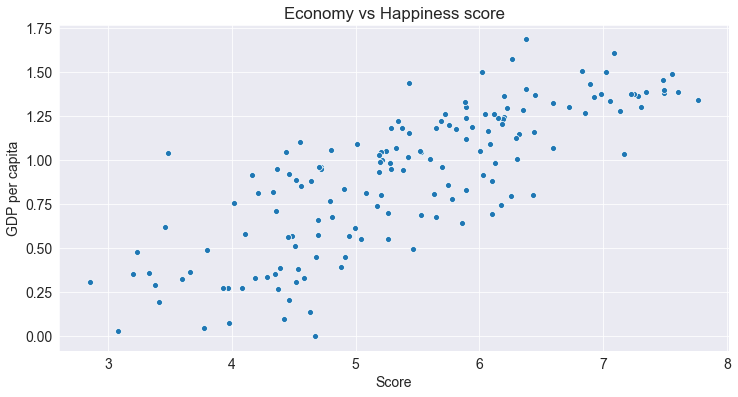

In [23]:
plt.figure(figsize=(12,6))
plt.title('Economy vs Happiness score')
sns.scatterplot(df['Score'],df['GDP per capita'])

### The Countries with more happiness scores have greater GDP per Capita as per the trend of above plot. So we might consider capital(money) as  one of the major contributing factors in determining the happiness scores.

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranavrnambiar/zerotopandas-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/pranavrnambiar/zerotopandas-course-project


'https://jovian.ml/pranavrnambiar/zerotopandas-course-project'

## Asking and Answering Questions

TODO

## Q1. Which Region has the highest happiness score?

In [26]:
#To find this we will group by region and aggregate by mean 
dff = df.groupby(['Country or region']).mean()

happy_score_dff = dff.sort_values(by='Score',ascending=False)
happy_score_dff

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


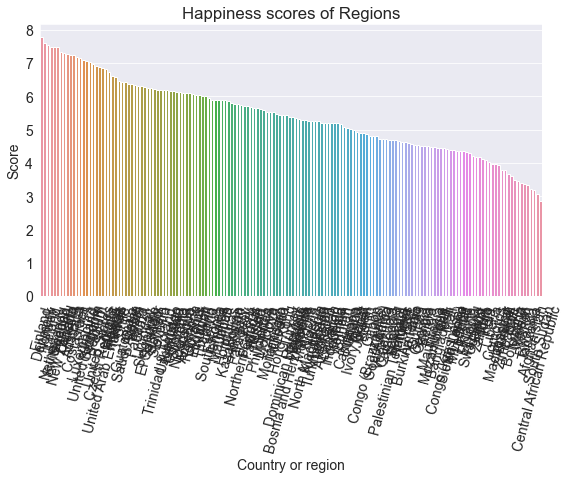

In [27]:
plt.xticks(rotation = 75)
plt.title('Happiness scores of Regions')
sns.barplot(df.index,df['Score']);

### So,the region "FINLAND" has the highest happiness score  even if the top 4 countries were from Western Europe.

## Q2. Which region is most generous?

In [28]:
generous_dff = dff.sort_values(by = 'Generosity',ascending=False )
generous_dff

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Myanmar,131,4.360,0.710,1.181,0.555,0.525,0.566,0.172
Indonesia,92,5.192,0.931,1.203,0.660,0.491,0.498,0.028
Haiti,147,3.597,0.323,0.688,0.449,0.026,0.419,0.110
Malta,22,6.726,1.300,1.520,0.999,0.564,0.375,0.151
Kenya,121,4.509,0.512,0.983,0.581,0.431,0.372,0.053
...,...,...,...,...,...,...,...,...
Gabon,104,4.799,1.057,1.183,0.571,0.295,0.043,0.055
Morocco,89,5.208,0.801,0.782,0.782,0.418,0.036,0.076
Azerbaijan,90,5.208,1.043,1.147,0.769,0.351,0.035,0.182


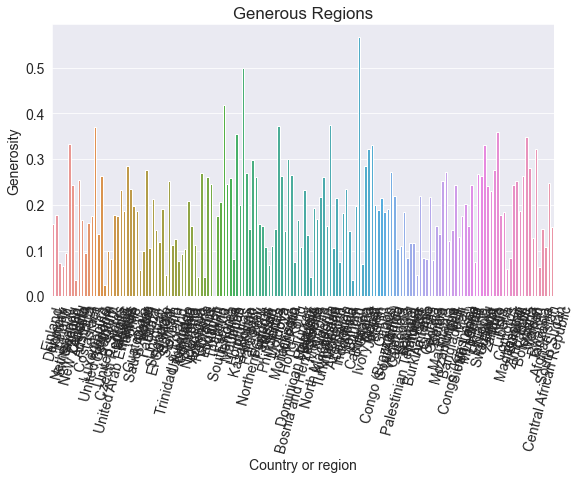

In [29]:
plt.xticks(rotation = 75)
plt.title('Generous Regions')
sns.barplot(df.index,dff['Generosity']);

### So,the region "Myanmar" has the highest Generosity  with most other column values to be high.So, we can say Goverments of countries in this region are doing a great job in serving their people.

## Q3. How much role does government play in deciding happiness of a nation?

In [30]:
df = df.reset_index()

In [31]:
df

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


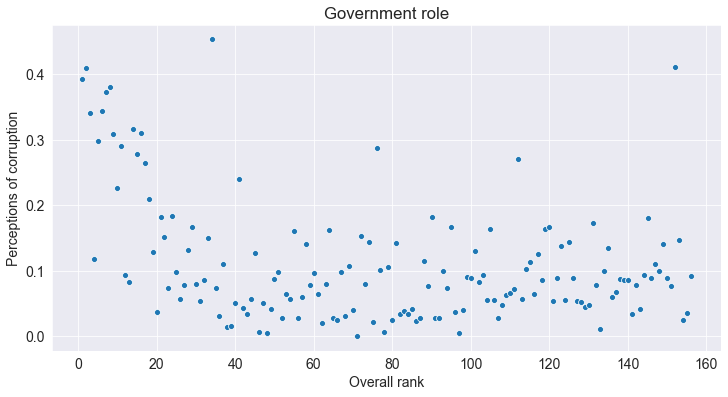

In [32]:
plt.figure(figsize=(12,6))
plt.title('Government role')
sns.scatterplot(df['Overall rank'],df['Perceptions of corruption']);

### So, we can see countries with lower Happiness Rank i.e countries with high happiness scores have more trust on government.

## Q4 Does money (Economy (GDP per Capita))  matters in deciding happiness of people?



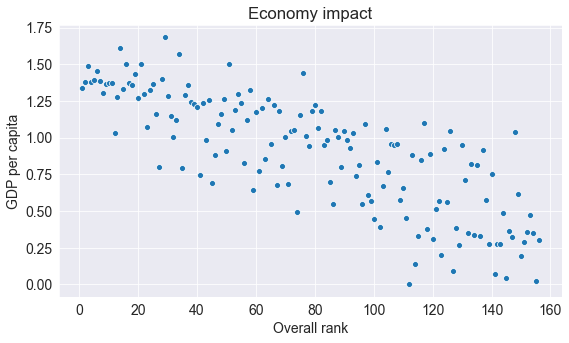

In [33]:
plt.title('Economy impact')
sns.scatterplot(df['Overall rank'],df['GDP per capita']);

### From above plot we can see that the countries having  lower ranks(higher happiness scores) have higher  GDP per capita. Higher  GDP per capita means less unemployment and unemployment is a one of the deciding factors for happiness. So we can definetly say from the data set  that money matters to some extent in making people happy

 ## Q5. How many Countries have good health facilities ?
 

### let's find the mean of 'Health (Life Expectancy)':


In [34]:
df['Healthy life expectancy'].mean()

0.7252435897435898

(array([  4.,  15.,  30., 107.]),
 array([0.        , 0.2       , 0.4       , 0.63025937, 1.141     ]),
 <BarContainer object of 4 artists>)

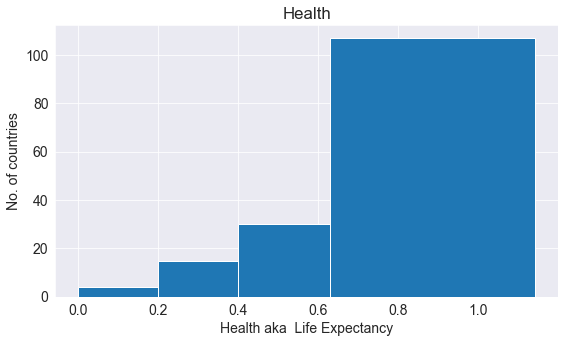

In [35]:
plt.xlabel('Health aka  Life Expectancy')
plt.ylabel('No. of countries')
plt.title('Health')
plt.hist(df['Healthy life expectancy'],bins=(0,0.2,0.4,0.6302593670886076,df['Healthy life expectancy'].max()))

### There are around 107  countries between  (0.63025937 ,1.141 ) where our mean=0.63025937 and max_value= 1.141 . So we can say 107 countries have good health facilties. 

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranavrnambiar/zerotopandas-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/pranavrnambiar/zerotopandas-course-project


'https://jovian.ml/pranavrnambiar/zerotopandas-course-project'

## TO Conclude

TODO

### So we got a lot of information about the word happines score and the factors affecting. We plotted graphs to go analyse the data carefully to see what factors affect it.

### The Relationship between Economy of a country and the happiness rank:

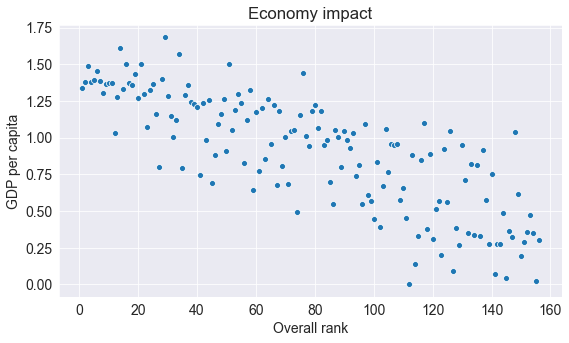

In [38]:
plt.title('Economy impact')
sns.scatterplot(df['Overall rank'],df['GDP per capita']);

#### Happy countries tend to have higher GDP per capita

### The Relationship between Freedom and Happiness rank:

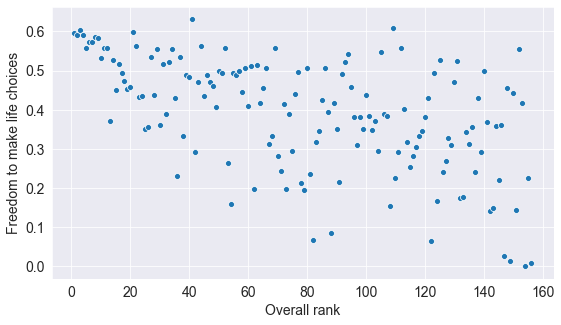

In [39]:
rand_df = df.copy()
rand_df = rand_df.reset_index()

sns.scatterplot(rand_df['Overall rank'],rand_df['Freedom to make life choices']);

#### So, The more the  free a country is the  lower the Happiness rank (and higher the happiness score)


### The relation between 3 factors 'Freedom'  , 'Health' , 'Perception of corruption' of the top 15 countries:

Text(0.5, 0, 'Countries')

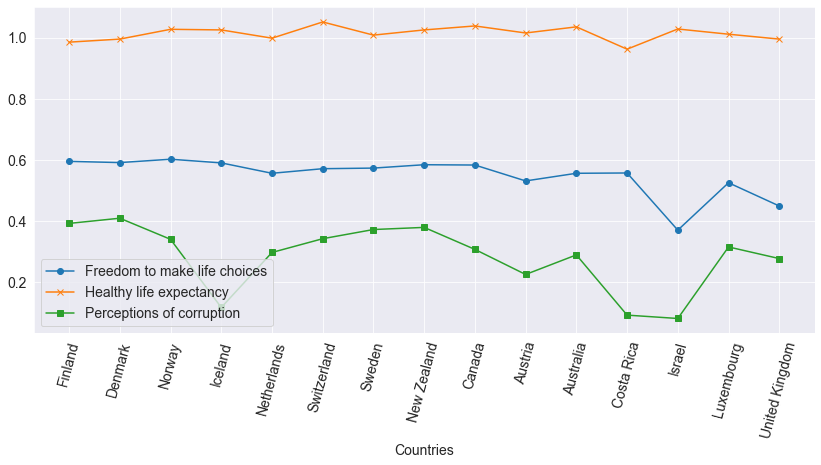

In [40]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=75)
plt.plot(top_happy_countries['Freedom to make life choices'],marker='o')
plt.plot(top_happy_countries['Healthy life expectancy'],marker='x')
plt.plot(top_happy_countries['Perceptions of corruption'],marker='s')
plt.legend(['Freedom to make life choices','Healthy life expectancy','Perceptions of corruption'])

plt.xlabel('Countries')


#### most of the top happy countries have balanced values for above 3 factors 

### So to conclude  Happiness is different for different people and we really cannot measure happiness.There are a lot of contributing factors like freedom , money , family , generousity , health all of which are important.We found that top happy countries have balanced values for these factors which is really mandatory.

### The countries with lower happiness scores can analyse this data and try to provide happier lifes and healthier society to their citizens.

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranavrnambiar/zerotopandas-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/pranavrnambiar/zerotopandas-course-project


'https://jovian.ml/pranavrnambiar/zerotopandas-course-project'

## References and Future Work

TODO

### In  Future  we can compare the progress of countries in the past 4 years  i.e from 2015 to 2018.

In [48]:
#following data frames are for comparison for further analysis
# df_2016 = pd.read_csv('2015.csv')
# df_2017 = pd.read_csv('2016.csv')
# df_2018 = pd.read_csv('2017.csv')
# df_2019 = pd.read_csv('2018.csv')

### Also we can  take a dataset of countries with their  Pollution rate  to  analyse  whether the less happy countries have more contribute to these.

In [51]:
import jovian

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranavrnambiar/zerotopandas-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/pranavrnambiar/zerotopandas-course-project


'https://jovian.ml/pranavrnambiar/zerotopandas-course-project'